# 概要

* 日次のスレッド数をprophet使って予測してみる

# 初期設定

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from prophet import Prophet

# 読み込み

In [3]:
# 確認
y = 2019
dfs = [pd.read_pickle('data/' + f'list_{y}.pkl') for y in range(2014, 2020)]
df = pd.concat(dfs, axis=0, ignore_index=True).sort_values('日付')
df

,スレタイ,日付,リンク
0,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 2人目(1000),2014-03-23 12:21:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
1,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 3人目 (1000),2014-03-24 12:23:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
3,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 4人目 (1000),2014-03-24 23:49:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
2,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 4人目 (1000),2014-03-25 23:04:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
4,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 6人目(1000),2014-03-26 16:21:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
...,...,...,...
15791,【mobage】アイドルマスターｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ17164人目(1000),2019-12-31 20:29:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
15792,【mobage】アイドルマスターｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ17165人目【ご報告乱舞コンマ】(...,2019-12-31 21:12:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
15793,【mobage】アイドルマスターｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ17166人目【比奈コンマ】(1001),2019-12-31 21:57:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
15794,【mobage】アイドルマスターｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ17167人目【今年最後の比奈コンマ...,2019-12-31 23:01:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...


# 日次集計

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15796 entries, 0 to 15795
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   スレタイ    15796 non-null  object        
 1   日付      15796 non-null  datetime64[ns]
 2   リンク     15796 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 493.6+ KB


In [5]:
df['ds'] = df['日付'].apply(lambda x: datetime.datetime(x.year, x.month, x.day))
df.head()

,スレタイ,日付,リンク,ds
0,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 2人目(1000),2014-03-23 12:21:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...,2014-03-23
1,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 3人目 (1000),2014-03-24 12:23:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...,2014-03-24
3,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 4人目 (1000),2014-03-24 23:49:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...,2014-03-24
2,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 4人目 (1000),2014-03-25 23:04:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...,2014-03-25
4,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 6人目(1000),2014-03-26 16:21:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...,2014-03-26


In [6]:
df_daily = (
    df
    .groupby('ds')['日付']
    .count()
    .reset_index()
    .rename(columns={'日付': 'y'})
)
df_daily

,ds,y
0,2014-03-23,1
1,2014-03-24,2
2,2014-03-25,1
3,2014-03-26,1
4,2014-03-27,1
...,...,...
2049,2019-12-27,12
2050,2019-12-28,14
2051,2019-12-29,13
2052,2019-12-30,14


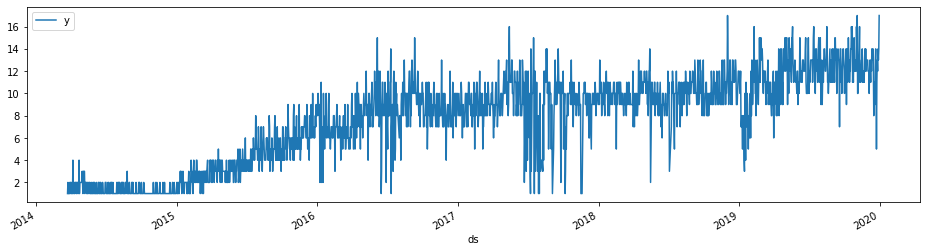

In [7]:
df_daily.plot(x='ds', y='y', figsize=(16, 4))

In [8]:
# 2016年以降に絞る
date_filter = df_daily['ds'].apply(lambda x: x.year >= 2016)

In [9]:
df_daily = df_daily[date_filter]

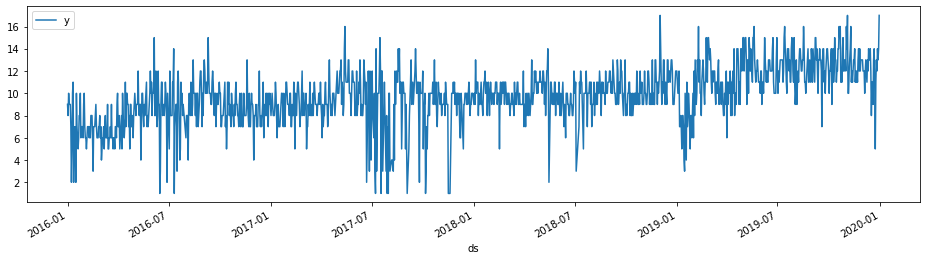

In [10]:
df_daily.plot(x='ds', y='y', figsize=(16, 4))

# Prophetで予測

* トレンドと周期性のみ

In [11]:
# -2018で学習し、2019を予測してみる
past_filter = df_daily['ds'].apply(lambda x: x.year <= 2018)

In [12]:
df_past = df_daily[past_filter]
df_future = df_daily[~past_filter]

**Learning**

In [13]:
m = Prophet()
m.fit(df_past)

INFO:numexpr.utils:NumExpr defaulting to 6 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1419,2019-12-26
1420,2019-12-27
1421,2019-12-28
1422,2019-12-29
1423,2019-12-30


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1419,2019-12-26,11.030844,8.463359,13.526663
1420,2019-12-27,11.259343,8.910267,13.662348
1421,2019-12-28,12.338502,10.008681,14.741007
1422,2019-12-29,13.154614,10.732441,15.481754
1423,2019-12-30,11.567355,9.119467,13.910139


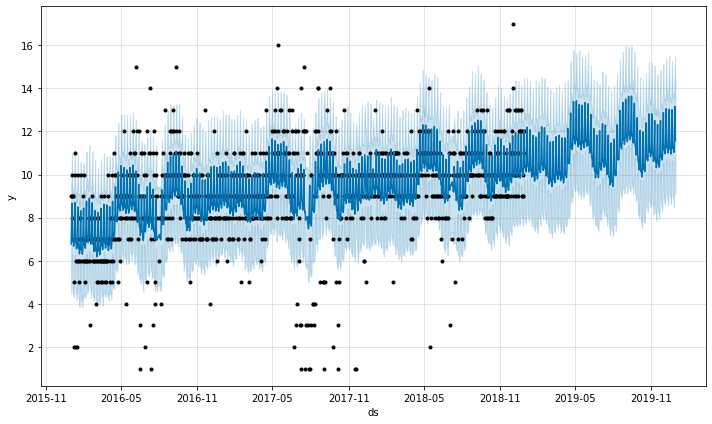

In [16]:
fig1 = m.plot(forecast)

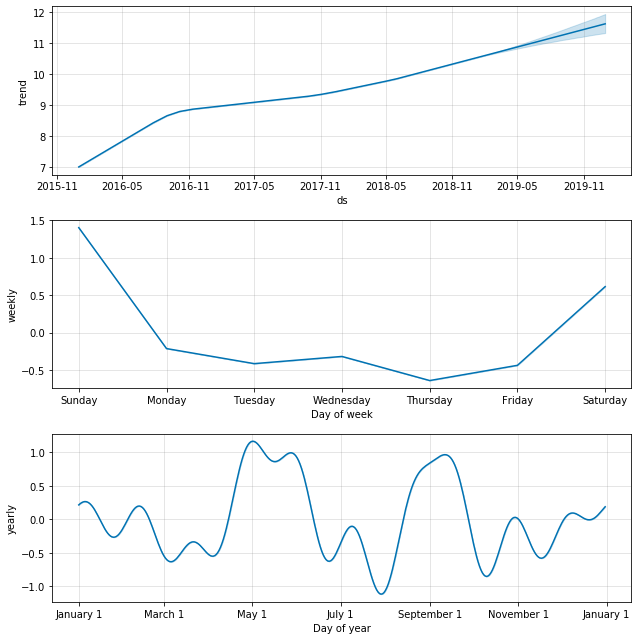

In [17]:
fig2 = m.plot_components(forecast)

**compare actual/pred**

In [18]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,7.013613,4.454310,9.263648,7.013613,7.013613,-0.238749,-0.238749,-0.238749,-0.436220,-0.436220,-0.436220,0.197471,0.197471,0.197471,0.0,0.0,0.0,6.774864
1,2016-01-02,7.020523,5.626599,10.138185,7.020523,7.020523,0.834451,0.834451,0.834451,0.615836,0.615836,0.615836,0.218615,0.218615,0.218615,0.0,0.0,0.0,7.854975
2,2016-01-03,7.027433,6.310348,11.000533,7.027433,7.027433,1.640113,1.640113,1.640113,1.403623,1.403623,1.403623,0.236489,0.236489,0.236489,0.0,0.0,0.0,8.667546
3,2016-01-04,7.034343,4.772912,9.412365,7.034343,7.034343,0.037994,0.037994,0.037994,-0.212313,-0.212313,-0.212313,0.250307,0.250307,0.250307,0.0,0.0,0.0,7.072337
4,2016-01-05,7.041254,4.604576,9.155216,7.041254,7.041254,-0.154267,-0.154267,-0.154267,-0.413655,-0.413655,-0.413655,0.259388,0.259388,0.259388,0.0,0.0,0.0,6.886987


In [19]:
df_actual_pred = pd.merge(df_future, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')
df_actual_pred.head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-01-01,12,10.306060,7.809993,12.578463
1,2019-01-02,11,10.425550,8.000013,12.870883
2,2019-01-03,10,10.123558,7.700049,12.526958
3,2019-01-04,11,10.342731,7.976158,12.609436
4,2019-01-05,12,11.405662,9.160418,13.760043


In [20]:
df_actual_pred['yhat'] = df_actual_pred['yhat'].apply(round)
df_actual_pred.head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-01-01,12,10,7.809993,12.578463
1,2019-01-02,11,10,8.000013,12.870883
2,2019-01-03,10,10,7.700049,12.526958
3,2019-01-04,11,10,7.976158,12.609436
4,2019-01-05,12,11,9.160418,13.760043


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
y_true = df_actual_pred['y']
y_pred = df_actual_pred['yhat']
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 4.362637362637362, MAE: 1.6153846153846154


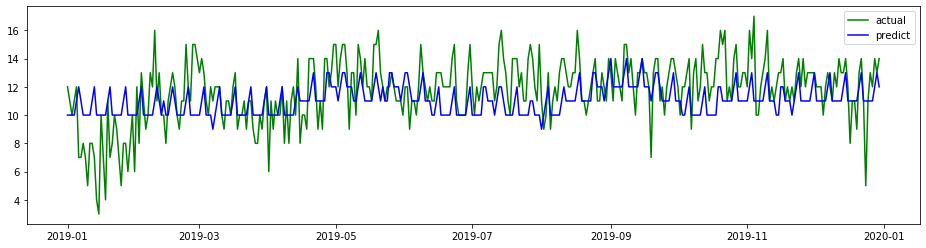

In [23]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(df_actual_pred['ds'], df_actual_pred['y'], label='actual', c='g')
ax.plot(df_actual_pred['ds'], df_actual_pred['yhat'], label='predict', c='b')
ax.legend()
plt.show()

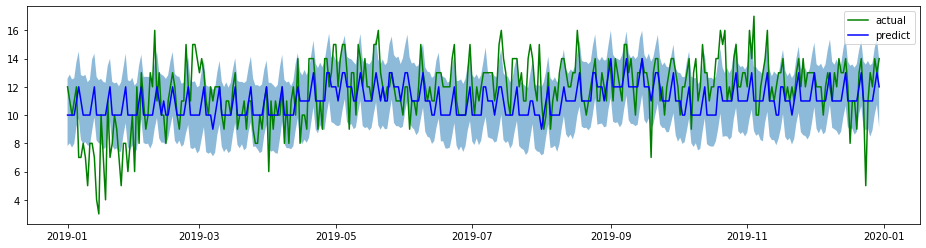

In [24]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(df_actual_pred['ds'], df_actual_pred['y'], label='actual', c='g')
ax.plot(df_actual_pred['ds'], df_actual_pred['yhat'], label='predict', c='b')
ax.fill_between(df_actual_pred['ds'], df_actual_pred['yhat_lower'], df_actual_pred['yhat_upper'], alpha=0.5)
ax.legend()
plt.show()

In [25]:
df_actual_pred['diff'] = df_actual_pred['yhat'] - df_actual_pred['y']
df_actual_pred.head()

,ds,y,yhat,yhat_lower,yhat_upper,diff
0,2019-01-01,12,10,7.809993,12.578463,-2
1,2019-01-02,11,10,8.000013,12.870883,-1
2,2019-01-03,10,10,7.700049,12.526958,0
3,2019-01-04,11,10,7.976158,12.609436,-1
4,2019-01-05,12,11,9.160418,13.760043,-1


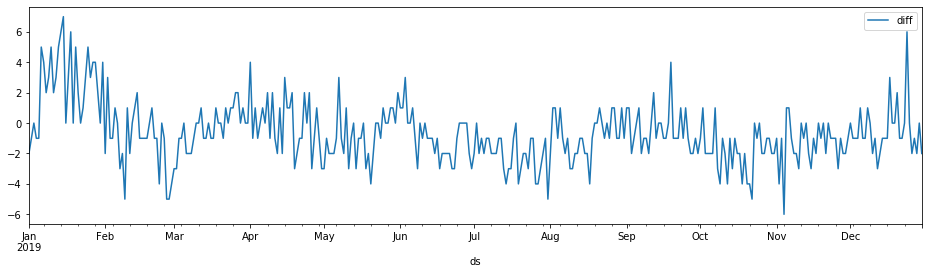

In [26]:
df_actual_pred.plot(x='ds', y='diff', figsize=(16, 4))

**Error Analysis**

In [27]:
# !pip install jpholiday

In [28]:
import jpholiday

In [29]:
df_actual_pred = pd.merge(df_past, forecast[['ds', 'yhat']], on='ds', how='inner')
df_actual_pred.tail()

,ds,y,yhat
1054,2018-12-26,9,10.237877
1055,2018-12-27,9,9.941547
1056,2018-12-28,10,10.172445
1057,2018-12-29,11,11.252998
1058,2018-12-30,12,12.069408


In [30]:
df_actual_pred['yhat'] = df_actual_pred['yhat'].apply(round)
df_actual_pred.head()

,ds,y,yhat
0,2016-01-01,9,7
1,2016-01-02,8,8
2,2016-01-03,10,9
3,2016-01-04,9,7
4,2016-01-05,9,7


In [31]:
df_actual_pred['diff'] = df_actual_pred['yhat'] - df_actual_pred['y']
df_actual_pred.head()

,ds,y,yhat,diff
0,2016-01-01,9,7,-2
1,2016-01-02,8,8,0
2,2016-01-03,10,9,-1
3,2016-01-04,9,7,-2
4,2016-01-05,9,7,-2


In [32]:
df_actual_pred['jpholiday'] = df_actual_pred['ds'].apply(jpholiday.is_holiday)
df_actual_pred.head()

,ds,y,yhat,diff,jpholiday
0,2016-01-01,9,7,-2,True
1,2016-01-02,8,8,0,False
2,2016-01-03,10,9,-1,False
3,2016-01-04,9,7,-2,False
4,2016-01-05,9,7,-2,False


In [33]:
df_actual_pred['diff'].describe()

count    1059.000000
mean        0.016053
std         1.860628
min        -5.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max        11.000000
Name: diff, dtype: float64

In [34]:
df_actual_pred.groupby('jpholiday')['diff'].describe()

,count,mean,std,min,25%,50%,75%,max
jpholiday,,,,,,,,
False,1006.0,0.055666,1.85839,-5.0,-1.0,0.0,1.0,11.0
True,53.0,-0.735849,1.75577,-4.0,-2.0,-1.0,0.0,5.0


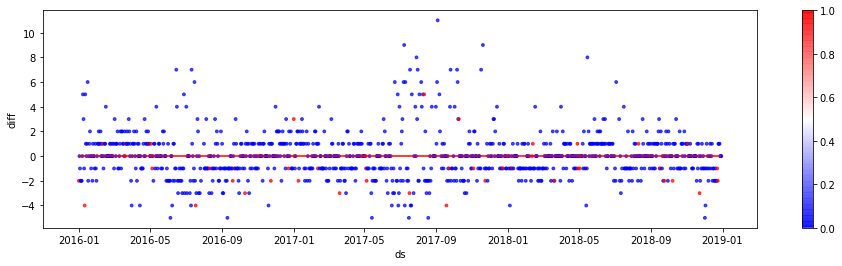

In [35]:
fig, ax = plt.subplots(figsize=(16, 4))
df_actual_pred.plot(kind='scatter', x='ds', y='diff', alpha=0.7, s=8, c=df_actual_pred['jpholiday'], cmap='bwr', ax=ax)
ax.hlines(y=0, xmin=df_actual_pred['ds'].min(), xmax=df_actual_pred['ds'].max(), color='r')
plt.show()

In [36]:
from scipy import stats

In [37]:
# ウェルチの t 検定
is_jpholiday = df_actual_pred['jpholiday']
rvs1 = df_actual_pred.loc[is_jpholiday, 'diff']
rvs2 = df_actual_pred.loc[~is_jpholiday, 'diff']
stats.ttest_ind(rvs1, rvs2, equal_var = False)

Ttest_indResult(statistic=-3.189164419562924, pvalue=0.0022964655955129707)

# Prophetで予測

* トレンドと周期性
* 日本の休日の影響も入れる

In [38]:
# -2018で学習し、2019を予測してみる
past_filter = df_daily['ds'].apply(lambda x: x.year <= 2018)

In [39]:
df_past = df_daily[past_filter]
df_future = df_daily[~past_filter]

In [40]:
holiday_flg = df_daily['ds'].apply(jpholiday.is_holiday)
holidays = df_daily.loc[holiday_flg, ['ds']]
holidays['holiday'] = 'jpholiday'
holidays

,ds,holiday
630,2016-01-01,jpholiday
640,2016-01-11,jpholiday
671,2016-02-11,jpholiday
709,2016-03-20,jpholiday
710,2016-03-21,jpholiday
...,...,...
1975,2019-10-14,jpholiday
1983,2019-10-22,jpholiday
1995,2019-11-03,jpholiday
1996,2019-11-04,jpholiday


**Learning**

In [41]:
m = Prophet(holidays=holidays)
m.fit(df_past)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1419,2019-12-26
1420,2019-12-27
1421,2019-12-28
1422,2019-12-29
1423,2019-12-30


In [43]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1419,2019-12-26,10.779132,8.455873,12.893363
1420,2019-12-27,10.996038,8.707848,13.414479
1421,2019-12-28,12.069698,9.548355,14.357725
1422,2019-12-29,12.882181,10.475839,15.144167
1423,2019-12-30,11.205452,8.891457,13.686300


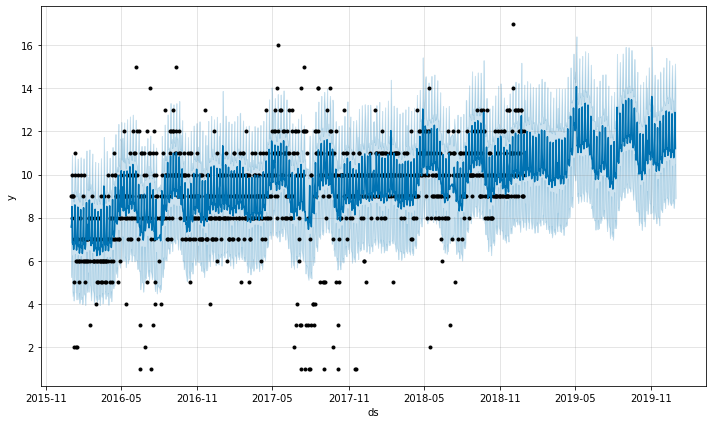

In [44]:
fig1 = m.plot(forecast)

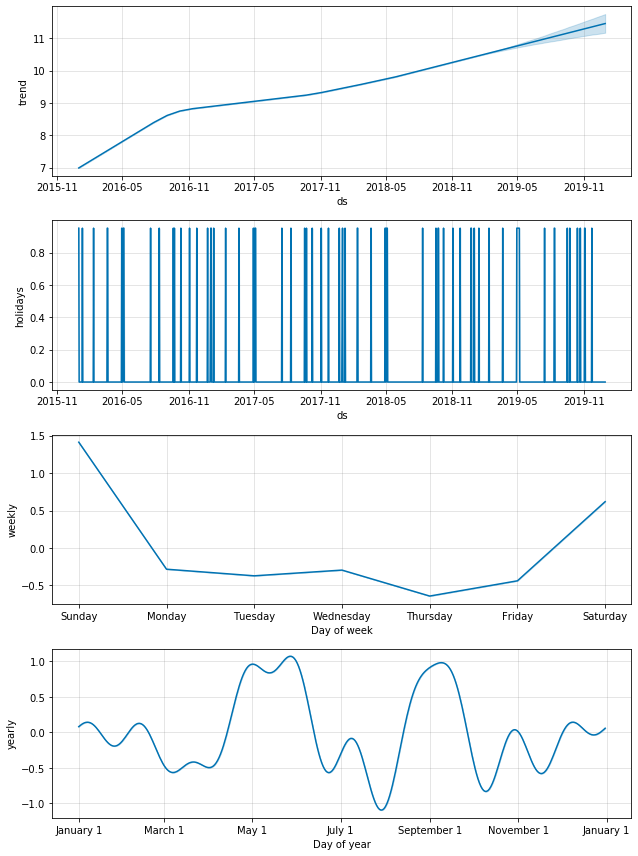

In [45]:
fig2 = m.plot_components(forecast)

**compare actual/pred**

In [46]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,6.987805,5.252618,9.999884,6.987805,6.987805,0.578183,0.578183,0.578183,0.95104,...,-0.438638,-0.438638,-0.438638,0.065781,0.065781,0.065781,0.0,0.0,0.0,7.565988
1,2016-01-02,6.994593,5.366649,9.953735,6.994593,6.994593,0.702617,0.702617,0.702617,0.00000,...,0.618997,0.618997,0.618997,0.083621,0.083621,0.083621,0.0,0.0,0.0,7.697210
2,2016-01-03,7.001380,6.248825,10.901339,7.001380,7.001380,1.513321,1.513321,1.513321,0.00000,...,1.413143,1.413143,1.413143,0.100178,0.100178,0.100178,0.0,0.0,0.0,8.514701
3,2016-01-04,7.008168,4.554285,9.151601,7.008168,7.008168,-0.168860,-0.168860,-0.168860,0.00000,...,-0.283598,-0.283598,-0.283598,0.114739,0.114739,0.114739,0.0,0.0,0.0,6.839308
4,2016-01-05,7.014955,4.361523,8.960807,7.014955,7.014955,-0.245304,-0.245304,-0.245304,0.00000,...,-0.371954,-0.371954,-0.371954,0.126650,0.126650,0.126650,0.0,0.0,0.0,6.769651


In [47]:
df_actual_pred = pd.merge(df_future, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')
df_actual_pred.head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-01-01,12,11.077239,8.656483,13.449052
1,2019-01-02,11,10.223009,7.757696,12.555753
2,2019-01-03,10,9.895177,7.440339,12.291419
3,2019-01-04,11,10.115712,7.708123,12.378606
4,2019-01-05,12,11.187347,8.786862,13.445500


In [48]:
df_actual_pred['yhat'] = df_actual_pred['yhat'].apply(round)
df_actual_pred.head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-01-01,12,11,8.656483,13.449052
1,2019-01-02,11,10,7.757696,12.555753
2,2019-01-03,10,10,7.440339,12.291419
3,2019-01-04,11,10,7.708123,12.378606
4,2019-01-05,12,11,8.786862,13.445500


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
# 精度悪くなってて草
y_true = df_actual_pred['y']
y_pred = df_actual_pred['yhat']
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 4.4532967032967035, MAE: 1.64010989010989


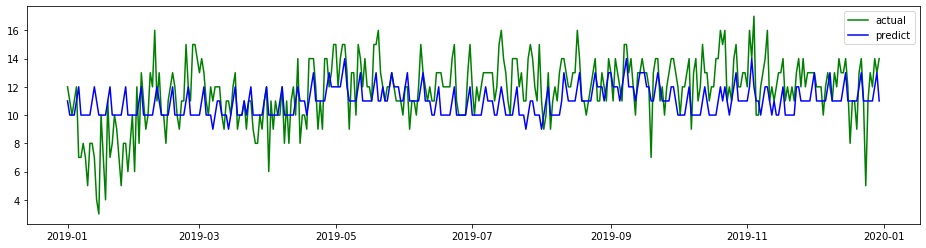

In [51]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(df_actual_pred['ds'], df_actual_pred['y'], label='actual', c='g')
ax.plot(df_actual_pred['ds'], df_actual_pred['yhat'], label='predict', c='b')
ax.legend()
plt.show()

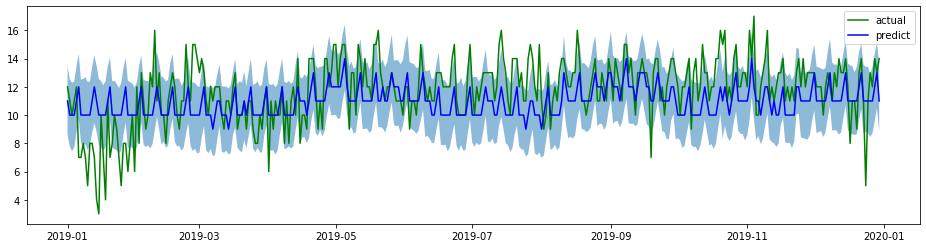

In [52]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(df_actual_pred['ds'], df_actual_pred['y'], label='actual', c='g')
ax.plot(df_actual_pred['ds'], df_actual_pred['yhat'], label='predict', c='b')
ax.fill_between(df_actual_pred['ds'], df_actual_pred['yhat_lower'], df_actual_pred['yhat_upper'], alpha=0.5)
ax.legend()
plt.show()

In [53]:
df_actual_pred['diff'] = df_actual_pred['yhat'] - df_actual_pred['y']
df_actual_pred.head()

,ds,y,yhat,yhat_lower,yhat_upper,diff
0,2019-01-01,12,11,8.656483,13.449052,-1
1,2019-01-02,11,10,7.757696,12.555753,-1
2,2019-01-03,10,10,7.440339,12.291419,0
3,2019-01-04,11,10,7.708123,12.378606,-1
4,2019-01-05,12,11,8.786862,13.445500,-1


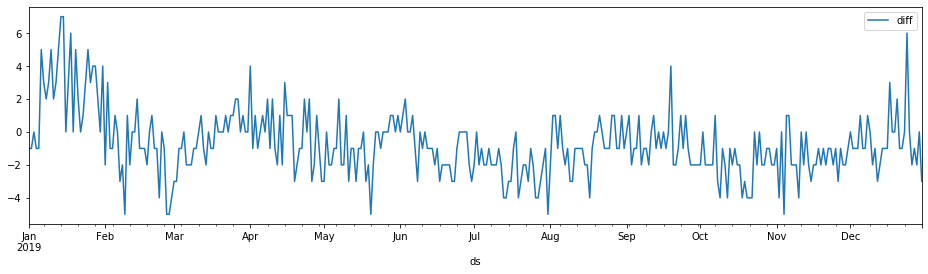

In [54]:
df_actual_pred.plot(x='ds', y='diff', figsize=(16, 4))

**Error Analysis**

In [55]:
df_actual_pred = pd.merge(df_past, forecast[['ds', 'yhat']], on='ds', how='inner')
df_actual_pred.tail()

,ds,y,yhat
1054,2018-12-26,9,10.090582
1055,2018-12-27,9,9.757713
1056,2018-12-28,10,9.978107
1057,2018-12-29,11,11.054560
1058,2018-12-30,12,11.869029


In [56]:
df_actual_pred['yhat'] = df_actual_pred['yhat'].apply(round)
df_actual_pred.head()

,ds,y,yhat
0,2016-01-01,9,8
1,2016-01-02,8,8
2,2016-01-03,10,9
3,2016-01-04,9,7
4,2016-01-05,9,7


In [57]:
df_actual_pred['diff'] = df_actual_pred['yhat'] - df_actual_pred['y']
df_actual_pred.head()

,ds,y,yhat,diff
0,2016-01-01,9,8,-1
1,2016-01-02,8,8,0
2,2016-01-03,10,9,-1
3,2016-01-04,9,7,-2
4,2016-01-05,9,7,-2


In [58]:
df_actual_pred['jpholiday'] = df_actual_pred['ds'].apply(jpholiday.is_holiday)
df_actual_pred.head()

,ds,y,yhat,diff,jpholiday
0,2016-01-01,9,8,-1,True
1,2016-01-02,8,8,0,False
2,2016-01-03,10,9,-1,False
3,2016-01-04,9,7,-2,False
4,2016-01-05,9,7,-2,False


In [59]:
# 学習データは、やっぱりjpholiday入れたほうが精度良くなるように調整されてる
df_actual_pred['diff'].describe()

count    1059.000000
mean        0.006610
std         1.848965
min        -5.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max        11.000000
Name: diff, dtype: float64

In [60]:
df_actual_pred.groupby('jpholiday')['diff'].describe()

,count,mean,std,min,25%,50%,75%,max
jpholiday,,,,,,,,
False,1006.0,0.009940,1.854912,-5.0,-1.0,0.0,1.0,11.0
True,53.0,-0.056604,1.747692,-4.0,-1.0,0.0,1.0,5.0


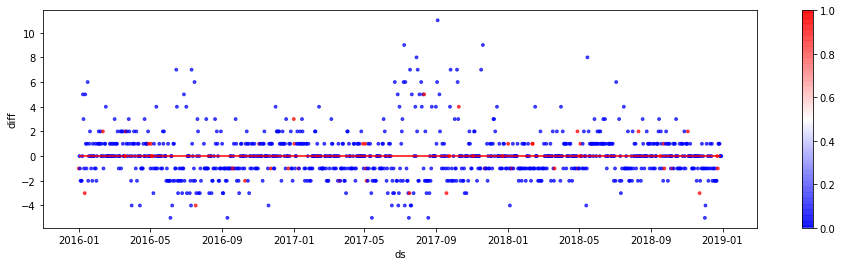

In [61]:
fig, ax = plt.subplots(figsize=(16, 4))
df_actual_pred.plot(kind='scatter', x='ds', y='diff', alpha=0.7, s=8, c=df_actual_pred['jpholiday'], cmap='bwr', ax=ax)
ax.hlines(y=0, xmin=df_actual_pred['ds'].min(), xmax=df_actual_pred['ds'].max(), color='r')
plt.show()

In [62]:
# ウェルチの t 検定
is_jpholiday = df_actual_pred['jpholiday']
rvs1 = df_actual_pred.loc[is_jpholiday, 'diff']
rvs2 = df_actual_pred.loc[~is_jpholiday, 'diff']
stats.ttest_ind(rvs1, rvs2, equal_var = False)

Ttest_indResult(statistic=-0.2693170428486285, pvalue=0.7886358879126429)